# Imports

In [1]:
import zipfile
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Download Data

In [2]:
dataset_name = 'spaceship-titanic'

In [7]:
!kaggle competitions download -c 'spaceship-titanic'

spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
path_to_zip_file = os.getcwd() + '/' + dataset_name + '.zip'
directory_to_extract_to = os.getcwd() + '/' + dataset_name

In [9]:
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

# Load Data

In [10]:
data = pd.read_csv(directory_to_extract_to + '/train.csv')

# Missing Values

In [11]:
num_vals = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [12]:
data[['Deck', 'CabinNumber', 'Side']] = data['Cabin'].str.split('/', expand=True)
data.drop(columns=['Cabin','PassengerId', 'Name'], inplace=True)
data.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported Deck CabinNumber Side  
0           0.0     0.0     0.0        False    B           0    P  
1          25.0   549.0    44.0         True    F           0    S  
2           0.0  6715.0    49.0        False    A           0    S  
3         371.0  3329.0   193.0        False    A           0    S  
4         151.0   565.0     2.0         True    F           1    S

In [13]:
cat_vars = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

In [14]:
data[cat_vars] = data[cat_vars].replace(np.nan, 'Missing')

In [15]:
data.dropna(inplace=True)

In [16]:
data.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported Deck CabinNumber Side  
0           0.0     0.0     0.0        False    B           0    P  
1          25.0   549.0    44.0         True    F           0    S  
2           0.0  6715.0    49.0        False    A           0    S  
3         371.0  3329.0   193.0        False    A           0    S  
4         151.0   565.0     2.0         True    F           1    S

In [17]:
data.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
CabinNumber     0
Side            0
dtype: int64

In [18]:
data[cat_vars] = data[cat_vars].astype(str)

In [19]:
data.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported Deck CabinNumber Side  
0           0.0     0.0     0.0        False    B           0    P  
1          25.0   549.0    44.0         True    F           0    S  
2           0.0  6715.0    49.0        False    A           0    S  
3         371.0  3329.0   193.0        False    A           0    S  
4         151.0   565.0     2.0         True    F           1    S

In [20]:
for v in cat_vars:
    print(data[v].unique())

['Europa' 'Earth' 'Mars' 'Missing']
['False' 'True' 'Missing']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' 'Missing']
['False' 'True' 'Missing']
['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
['P' 'S']


# One Hot Encoding

In [21]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe_data = pd.DataFrame(ohe.fit_transform(data[cat_vars]).toarray())
ohe_data.head()

0    1    2    3    4    5    6    7    8    9   ...   14   15   16   17  \
0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0   
3  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    18   19   20   21   22   23  
0  0.0  0.0  0.0  0.0  1.0  0.0  
1  0.0  1.0  0.0  0.0  0.0  1.0  
2  0.0  0.0  0.0  0.0  0.0  1.0  
3  0.0  0.0  0.0  0.0  0.0  1.0  
4  0.0  1.0  0.0  0.0  0.0  1.0  

[5 rows x 24 columns]

In [22]:
ohe_data.columns = ohe.get_feature_names_out()

In [23]:
ohe_data

HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0                  0.0                1.0              0.0   
1                  1.0                0.0              0.0   
2                  0.0                1.0              0.0   
3                  0.0                1.0              0.0   
4                  1.0                0.0              0.0   
...                ...                ...              ...   
7436               0.0                1.0              0.0   
7437               1.0                0.0              0.0   
7438               1.0                0.0              0.0   
7439               0.0                1.0              0.0   
7440               0.0                1.0              0.0   

      HomePlanet_Missing  CryoSleep_False  CryoSleep_Missing  CryoSleep_True  \
0                    0.0              1.0                0.0             0.0   
1                    0.0              1.0                0.0             0.0   
2                    0.0              1.0                0.0             0.0   
3                    0.0              1.0                0.0             0.0   
4                    0.0              1.0                0.0             0.0   
...                  ...              ...                ...             ...   
7436                 0.0              1.0                0.0             0.0   
7437                 0.0              0.0                0.0             1.0   
7438                 0.0              1.0                0.0             0.0   
7439                 0.0              1.0                0.0             0.0   
7440                 0.0              1.0                0.0             0.0   

      Destination_55 Cancri e  Destination_Missing  Destination_PSO J318.5-22  \
0                         0.0                  0.0                        0.0   
1                         0.0                  0.0                        0.0   
2                         0.0                  0.0                        0.0   
3                         0.0                  0.0                        0.0   
4                         0.0                  0.0                        0.0   
...                       ...                  ...                        ...   
7436                      1.0                  0.0                        0.0   
7437                      0.0                  0.0                        1.0   
7438                      0.0                  0.0                        0.0   
7439                      1.0                  0.0                        0.0   
7440                      0.0                  0.0                        0.0   

      ...  Deck_A  Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  \
0     ...     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     ...     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
2     ...     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     ...     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     ...     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
...   ...     ...     ...     ...     ...     ...     ...     ...     ...   
7436  ...     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7437  ...     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
7438  ...     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
7439  ...     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
7440  ...     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   

      Side_P  Side_S  
0        1.0     0.0  
1        0.0     1.0  
2        0.0     1.0  
3        0.0     1.0  
4        0.0     1.0  
...      ...     ...  
7436     1.0     0.0  
7437     0.0     1.0  
7438     0.0     1.0  
7439     0.0     1.0  
7440     0.0     1.0  

[7441 rows x 24 columns]

In [24]:
data = data.reset_index(drop=True)
data

HomePlanet CryoSleep    Destination   Age    VIP  RoomService  FoodCourt  \
0        Europa     False    TRAPPIST-1e  39.0  False          0.0        0.0   
1         Earth     False    TRAPPIST-1e  24.0  False        109.0        9.0   
2        Europa     False    TRAPPIST-1e  58.0   True         43.0     3576.0   
3        Europa     False    TRAPPIST-1e  33.0  False          0.0     1283.0   
4         Earth     False    TRAPPIST-1e  16.0  False        303.0       70.0   
...         ...       ...            ...   ...    ...          ...        ...   
7436     Europa     False    55 Cancri e  41.0   True          0.0     6819.0   
7437      Earth      True  PSO J318.5-22  18.0  False          0.0        0.0   
7438      Earth     False    TRAPPIST-1e  26.0  False          0.0        0.0   
7439     Europa     False    55 Cancri e  32.0  False          0.0     1049.0   
7440     Europa     False    TRAPPIST-1e  44.0  False        126.0     4688.0   

      ShoppingMall     Spa  VRDeck  Transported Deck CabinNumber Side  
0              0.0     0.0     0.0        False    B           0    P  
1             25.0   549.0    44.0         True    F           0    S  
2              0.0  6715.0    49.0        False    A           0    S  
3            371.0  3329.0   193.0        False    A           0    S  
4            151.0   565.0     2.0         True    F           1    S  
...            ...     ...     ...          ...  ...         ...  ...  
7436           0.0  1643.0    74.0        False    A          98    P  
7437           0.0     0.0     0.0        False    G        1499    S  
7438        1872.0     1.0     0.0         True    G        1500    S  
7439           0.0   353.0  3235.0        False    E         608    S  
7440           0.0     0.0    12.0         True    E         608    S  

[7441 rows x 14 columns]

In [25]:
final_data = pd.concat([data, ohe_data], axis=1)

In [26]:
final_data

HomePlanet CryoSleep    Destination   Age    VIP  RoomService  FoodCourt  \
0        Europa     False    TRAPPIST-1e  39.0  False          0.0        0.0   
1         Earth     False    TRAPPIST-1e  24.0  False        109.0        9.0   
2        Europa     False    TRAPPIST-1e  58.0   True         43.0     3576.0   
3        Europa     False    TRAPPIST-1e  33.0  False          0.0     1283.0   
4         Earth     False    TRAPPIST-1e  16.0  False        303.0       70.0   
...         ...       ...            ...   ...    ...          ...        ...   
7436     Europa     False    55 Cancri e  41.0   True          0.0     6819.0   
7437      Earth      True  PSO J318.5-22  18.0  False          0.0        0.0   
7438      Earth     False    TRAPPIST-1e  26.0  False          0.0        0.0   
7439     Europa     False    55 Cancri e  32.0  False          0.0     1049.0   
7440     Europa     False    TRAPPIST-1e  44.0  False        126.0     4688.0   

      ShoppingMall     Spa  VRDeck  ...  Deck_A Deck_B Deck_C Deck_D  Deck_E  \
0              0.0     0.0     0.0  ...     0.0    1.0    0.0    0.0     0.0   
1             25.0   549.0    44.0  ...     0.0    0.0    0.0    0.0     0.0   
2              0.0  6715.0    49.0  ...     1.0    0.0    0.0    0.0     0.0   
3            371.0  3329.0   193.0  ...     1.0    0.0    0.0    0.0     0.0   
4            151.0   565.0     2.0  ...     0.0    0.0    0.0    0.0     0.0   
...            ...     ...     ...  ...     ...    ...    ...    ...     ...   
7436           0.0  1643.0    74.0  ...     1.0    0.0    0.0    0.0     0.0   
7437           0.0     0.0     0.0  ...     0.0    0.0    0.0    0.0     0.0   
7438        1872.0     1.0     0.0  ...     0.0    0.0    0.0    0.0     0.0   
7439           0.0   353.0  3235.0  ...     0.0    0.0    0.0    0.0     1.0   
7440           0.0     0.0    12.0  ...     0.0    0.0    0.0    0.0     1.0   

      Deck_F  Deck_G  Deck_T  Side_P  Side_S  
0        0.0     0.0     0.0     1.0     0.0  
1        1.0     0.0     0.0     0.0     1.0  
2        0.0     0.0     0.0     0.0     1.0  
3        0.0     0.0     0.0     0.0     1.0  
4        1.0     0.0     0.0     0.0     1.0  
...      ...     ...     ...     ...     ...  
7436     0.0     0.0     0.0     1.0     0.0  
7437     0.0     1.0     0.0     0.0     1.0  
7438     0.0     1.0     0.0     0.0     1.0  
7439     0.0     0.0     0.0     0.0     1.0  
7440     0.0     0.0     0.0     0.0     1.0  

[7441 rows x 38 columns]

In [27]:
final_data = final_data.drop(columns=cat_vars)

In [28]:
final_data

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  \
0     39.0          0.0        0.0           0.0     0.0     0.0        False   
1     24.0        109.0        9.0          25.0   549.0    44.0         True   
2     58.0         43.0     3576.0           0.0  6715.0    49.0        False   
3     33.0          0.0     1283.0         371.0  3329.0   193.0        False   
4     16.0        303.0       70.0         151.0   565.0     2.0         True   
...    ...          ...        ...           ...     ...     ...          ...   
7436  41.0          0.0     6819.0           0.0  1643.0    74.0        False   
7437  18.0          0.0        0.0           0.0     0.0     0.0        False   
7438  26.0          0.0        0.0        1872.0     1.0     0.0         True   
7439  32.0          0.0     1049.0           0.0   353.0  3235.0        False   
7440  44.0        126.0     4688.0           0.0     0.0    12.0         True   

     CabinNumber  HomePlanet_Earth  HomePlanet_Europa  ...  Deck_A  Deck_B  \
0              0               0.0                1.0  ...     0.0     1.0   
1              0               1.0                0.0  ...     0.0     0.0   
2              0               0.0                1.0  ...     1.0     0.0   
3              0               0.0                1.0  ...     1.0     0.0   
4              1               1.0                0.0  ...     0.0     0.0   
...          ...               ...                ...  ...     ...     ...   
7436          98               0.0                1.0  ...     1.0     0.0   
7437        1499               1.0                0.0  ...     0.0     0.0   
7438        1500               1.0                0.0  ...     0.0     0.0   
7439         608               0.0                1.0  ...     0.0     0.0   
7440         608               0.0                1.0  ...     0.0     0.0   

      Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Side_P  Side_S  
0        0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0  
1        0.0     0.0     0.0     1.0     0.0     0.0     0.0     1.0  
2        0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0  
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0  
4        0.0     0.0     0.0     1.0     0.0     0.0     0.0     1.0  
...      ...     ...     ...     ...     ...     ...     ...     ...  
7436     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0  
7437     0.0     0.0     0.0     0.0     1.0     0.0     0.0     1.0  
7438     0.0     0.0     0.0     0.0     1.0     0.0     0.0     1.0  
7439     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0  
7440     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0  

[7441 rows x 32 columns]

# Train/Test Split

In [29]:
X = final_data.drop(columns=['Transported'])
y = final_data['Transported']

In [30]:
X.head()

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck CabinNumber  \
0  39.0          0.0        0.0           0.0     0.0     0.0           0   
1  24.0        109.0        9.0          25.0   549.0    44.0           0   
2  58.0         43.0     3576.0           0.0  6715.0    49.0           0   
3  33.0          0.0     1283.0         371.0  3329.0   193.0           0   
4  16.0        303.0       70.0         151.0   565.0     2.0           1   

   HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  ...  Deck_A  Deck_B  \
0               0.0                1.0              0.0  ...     0.0     1.0   
1               1.0                0.0              0.0  ...     0.0     0.0   
2               0.0                1.0              0.0  ...     1.0     0.0   
3               0.0                1.0              0.0  ...     1.0     0.0   
4               1.0                0.0              0.0  ...     0.0     0.0   

   Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Side_P  Side_S  
0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0  
1     0.0     0.0     0.0     1.0     0.0     0.0     0.0     1.0  
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0  
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0  
4     0.0     0.0     0.0     1.0     0.0     0.0     0.0     1.0  

[5 rows x 31 columns]

In [31]:
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Simple Logistic Regression

In [33]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/Users/mmollon/Documents/GitHub/deploying-machine-learning-models/.mlops/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
clf.score(X_test, y_test)

0.7807630306286942

In [36]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

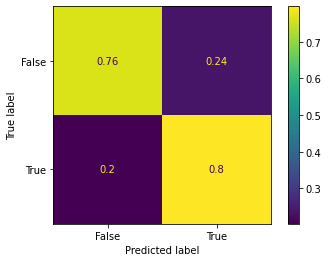

In [37]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# SimpleDecision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.7415368081676518

# Simple Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.7608812466415905

# Simple SVM

In [58]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [61]:
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm = svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.7979580870499732

# Simple Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gb = GradientBoostingClassifier()
gb = gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.814615797958087

# Simple Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7936593229446535

# Simple KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7743148844707146

# Load Test Data

In [38]:
test_data = pd.read_csv(directory_to_extract_to + '/test.csv')

# Missing Values

In [39]:
test_data[['Deck', 'CabinNumber', 'Side']] = test_data['Cabin'].str.split('/', expand=True)
test_data.drop(columns=['Cabin','PassengerId', 'Name'], inplace=True)
test_data.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0      Earth      True  TRAPPIST-1e  27.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  19.0  False          0.0        9.0   
2     Europa      True  55 Cancri e  31.0  False          0.0        0.0   
3     Europa     False  TRAPPIST-1e  38.0  False          0.0     6652.0   
4      Earth     False  TRAPPIST-1e  20.0  False         10.0        0.0   

   ShoppingMall     Spa  VRDeck Deck CabinNumber Side  
0           0.0     0.0     0.0    G           3    S  
1           0.0  2823.0     0.0    F           4    S  
2           0.0     0.0     0.0    C           0    S  
3           0.0   181.0   585.0    C           1    S  
4         635.0     0.0     0.0    F           5    S

In [40]:
test_data[cat_vars] = test_data[cat_vars].replace(np.nan, 'Missing')

In [41]:
test_data = test_data.fillna(test_data.median())

/var/folders/nj/4gc2pw7x5rxb1mnxxk0rstwh0000gn/T/ipykernel_32800/1865225786.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_data = test_data.fillna(test_data.median())


In [42]:
test_data.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0      Earth      True  TRAPPIST-1e  27.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  19.0  False          0.0        9.0   
2     Europa      True  55 Cancri e  31.0  False          0.0        0.0   
3     Europa     False  TRAPPIST-1e  38.0  False          0.0     6652.0   
4      Earth     False  TRAPPIST-1e  20.0  False         10.0        0.0   

   ShoppingMall     Spa  VRDeck Deck CabinNumber Side  
0           0.0     0.0     0.0    G           3    S  
1           0.0  2823.0     0.0    F           4    S  
2           0.0     0.0     0.0    C           0    S  
3           0.0   181.0   585.0    C           1    S  
4         635.0     0.0     0.0    F           5    S

In [43]:
test_data.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
CabinNumber     0
Side            0
dtype: int64

In [44]:
test_data[cat_vars] = test_data[cat_vars].astype(str)

In [45]:
test_data.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0      Earth      True  TRAPPIST-1e  27.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  19.0  False          0.0        9.0   
2     Europa      True  55 Cancri e  31.0  False          0.0        0.0   
3     Europa     False  TRAPPIST-1e  38.0  False          0.0     6652.0   
4      Earth     False  TRAPPIST-1e  20.0  False         10.0        0.0   

   ShoppingMall     Spa  VRDeck Deck CabinNumber Side  
0           0.0     0.0     0.0    G           3    S  
1           0.0  2823.0     0.0    F           4    S  
2           0.0     0.0     0.0    C           0    S  
3           0.0   181.0   585.0    C           1    S  
4         635.0     0.0     0.0    F           5    S

In [46]:
for v in cat_vars:
    print(test_data[v].unique())

['Earth' 'Europa' 'Mars' 'Missing']
['True' 'False' 'Missing']
['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' 'Missing']
['False' 'Missing' 'True']
['G' 'F' 'C' 'B' 'D' 'E' 'Missing' 'A' 'T']
['S' 'P' 'Missing']


# One Hot Encoding

In [47]:
ohe_test_data = pd.DataFrame(ohe.transform(test_data[cat_vars]).toarray())
ohe_test_data.head()

0    1    2    3    4    5    6    7    8    9   ...   14   15   16   17  \
0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
3  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
4  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    18   19   20   21   22   23  
0  0.0  0.0  1.0  0.0  0.0  1.0  
1  0.0  1.0  0.0  0.0  0.0  1.0  
2  0.0  0.0  0.0  0.0  0.0  1.0  
3  0.0  0.0  0.0  0.0  0.0  1.0  
4  0.0  1.0  0.0  0.0  0.0  1.0  

[5 rows x 24 columns]

In [48]:
ohe_test_data.columns = ohe.get_feature_names_out()

In [49]:
ohe_test_data

HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0                  1.0                0.0              0.0   
1                  1.0                0.0              0.0   
2                  0.0                1.0              0.0   
3                  0.0                1.0              0.0   
4                  1.0                0.0              0.0   
...                ...                ...              ...   
4272               1.0                0.0              0.0   
4273               1.0                0.0              0.0   
4274               0.0                0.0              1.0   
4275               0.0                1.0              0.0   
4276               1.0                0.0              0.0   

      HomePlanet_Missing  CryoSleep_False  CryoSleep_Missing  CryoSleep_True  \
0                    0.0              0.0                0.0             1.0   
1                    0.0              1.0                0.0             0.0   
2                    0.0              0.0                0.0             1.0   
3                    0.0              1.0                0.0             0.0   
4                    0.0              1.0                0.0             0.0   
...                  ...              ...                ...             ...   
4272                 0.0              0.0                0.0             1.0   
4273                 0.0              1.0                0.0             0.0   
4274                 0.0              0.0                0.0             1.0   
4275                 0.0              1.0                0.0             0.0   
4276                 0.0              0.0                0.0             1.0   

      Destination_55 Cancri e  Destination_Missing  Destination_PSO J318.5-22  \
0                         0.0                  0.0                        0.0   
1                         0.0                  0.0                        0.0   
2                         1.0                  0.0                        0.0   
3                         0.0                  0.0                        0.0   
4                         0.0                  0.0                        0.0   
...                       ...                  ...                        ...   
4272                      0.0                  0.0                        0.0   
4273                      0.0                  0.0                        0.0   
4274                      1.0                  0.0                        0.0   
4275                      0.0                  1.0                        0.0   
4276                      0.0                  0.0                        1.0   

      ...  Deck_A  Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  \
0     ...     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
1     ...     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
2     ...     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
3     ...     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
4     ...     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
...   ...     ...     ...     ...     ...     ...     ...     ...     ...   
4272  ...     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
4273  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4274  ...     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
4275  ...     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
4276  ...     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   

      Side_P  Side_S  
0        0.0     1.0  
1        0.0     1.0  
2        0.0     1.0  
3        0.0     1.0  
4        0.0     1.0  
...      ...     ...  
4272     0.0     1.0  
4273     0.0     0.0  
4274     1.0     0.0  
4275     1.0     0.0  
4276     0.0     1.0  

[4277 rows x 24 columns]

In [50]:
test_data = test_data.reset_index(drop=True)
test_data

HomePlanet CryoSleep    Destination   Age    VIP  RoomService  FoodCourt  \
0         Earth      True    TRAPPIST-1e  27.0  False          0.0        0.0   
1         Earth     False    TRAPPIST-1e  19.0  False          0.0        9.0   
2        Europa      True    55 Cancri e  31.0  False          0.0        0.0   
3        Europa     False    TRAPPIST-1e  38.0  False          0.0     6652.0   
4         Earth     False    TRAPPIST-1e  20.0  False         10.0        0.0   
...         ...       ...            ...   ...    ...          ...        ...   
4272      Earth      True    TRAPPIST-1e  34.0  False          0.0        0.0   
4273      Earth     False    TRAPPIST-1e  42.0  False          0.0      847.0   
4274       Mars      True    55 Cancri e  26.0  False          0.0        0.0   
4275     Europa     False        Missing  26.0  False          0.0     2680.0   
4276      Earth      True  PSO J318.5-22  43.0  False          0.0        0.0   

      ShoppingMall     Spa  VRDeck     Deck CabinNumber     Side  
0              0.0     0.0     0.0        G           3        S  
1              0.0  2823.0     0.0        F           4        S  
2              0.0     0.0     0.0        C           0        S  
3              0.0   181.0   585.0        C           1        S  
4            635.0     0.0     0.0        F           5        S  
...            ...     ...     ...      ...         ...      ...  
4272           0.0     0.0     0.0        G        1496        S  
4273          17.0    10.0   144.0  Missing       442.0  Missing  
4274           0.0     0.0     0.0        D         296        P  
4275           0.0     0.0   523.0        D         297        P  
4276           0.0     0.0     0.0        G        1498        S  

[4277 rows x 13 columns]

In [51]:
final_test_data = pd.concat([test_data, ohe_test_data], axis=1)

In [52]:
final_test_data

HomePlanet CryoSleep    Destination   Age    VIP  RoomService  FoodCourt  \
0         Earth      True    TRAPPIST-1e  27.0  False          0.0        0.0   
1         Earth     False    TRAPPIST-1e  19.0  False          0.0        9.0   
2        Europa      True    55 Cancri e  31.0  False          0.0        0.0   
3        Europa     False    TRAPPIST-1e  38.0  False          0.0     6652.0   
4         Earth     False    TRAPPIST-1e  20.0  False         10.0        0.0   
...         ...       ...            ...   ...    ...          ...        ...   
4272      Earth      True    TRAPPIST-1e  34.0  False          0.0        0.0   
4273      Earth     False    TRAPPIST-1e  42.0  False          0.0      847.0   
4274       Mars      True    55 Cancri e  26.0  False          0.0        0.0   
4275     Europa     False        Missing  26.0  False          0.0     2680.0   
4276      Earth      True  PSO J318.5-22  43.0  False          0.0        0.0   

      ShoppingMall     Spa  VRDeck  ... Deck_A Deck_B Deck_C  Deck_D  Deck_E  \
0              0.0     0.0     0.0  ...    0.0    0.0    0.0     0.0     0.0   
1              0.0  2823.0     0.0  ...    0.0    0.0    0.0     0.0     0.0   
2              0.0     0.0     0.0  ...    0.0    0.0    1.0     0.0     0.0   
3              0.0   181.0   585.0  ...    0.0    0.0    1.0     0.0     0.0   
4            635.0     0.0     0.0  ...    0.0    0.0    0.0     0.0     0.0   
...            ...     ...     ...  ...    ...    ...    ...     ...     ...   
4272           0.0     0.0     0.0  ...    0.0    0.0    0.0     0.0     0.0   
4273          17.0    10.0   144.0  ...    0.0    0.0    0.0     0.0     0.0   
4274           0.0     0.0     0.0  ...    0.0    0.0    0.0     1.0     0.0   
4275           0.0     0.0   523.0  ...    0.0    0.0    0.0     1.0     0.0   
4276           0.0     0.0     0.0  ...    0.0    0.0    0.0     0.0     0.0   

      Deck_F  Deck_G  Deck_T  Side_P  Side_S  
0        0.0     1.0     0.0     0.0     1.0  
1        1.0     0.0     0.0     0.0     1.0  
2        0.0     0.0     0.0     0.0     1.0  
3        0.0     0.0     0.0     0.0     1.0  
4        1.0     0.0     0.0     0.0     1.0  
...      ...     ...     ...     ...     ...  
4272     0.0     1.0     0.0     0.0     1.0  
4273     0.0     0.0     0.0     0.0     0.0  
4274     0.0     0.0     0.0     1.0     0.0  
4275     0.0     0.0     0.0     1.0     0.0  
4276     0.0     1.0     0.0     0.0     1.0  

[4277 rows x 37 columns]

In [53]:
final_test_data = final_test_data.drop(columns=cat_vars)

In [55]:
final_test_data

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck CabinNumber  \
0     27.0          0.0        0.0           0.0     0.0     0.0           3   
1     19.0          0.0        9.0           0.0  2823.0     0.0           4   
2     31.0          0.0        0.0           0.0     0.0     0.0           0   
3     38.0          0.0     6652.0           0.0   181.0   585.0           1   
4     20.0         10.0        0.0         635.0     0.0     0.0           5   
...    ...          ...        ...           ...     ...     ...         ...   
4272  34.0          0.0        0.0           0.0     0.0     0.0        1496   
4273  42.0          0.0      847.0          17.0    10.0   144.0       442.0   
4274  26.0          0.0        0.0           0.0     0.0     0.0         296   
4275  26.0          0.0     2680.0           0.0     0.0   523.0         297   
4276  43.0          0.0        0.0           0.0     0.0     0.0        1498   

      HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  ...  Deck_A  \
0                  1.0                0.0              0.0  ...     0.0   
1                  1.0                0.0              0.0  ...     0.0   
2                  0.0                1.0              0.0  ...     0.0   
3                  0.0                1.0              0.0  ...     0.0   
4                  1.0                0.0              0.0  ...     0.0   
...                ...                ...              ...  ...     ...   
4272               1.0                0.0              0.0  ...     0.0   
4273               1.0                0.0              0.0  ...     0.0   
4274               0.0                0.0              1.0  ...     0.0   
4275               0.0                1.0              0.0  ...     0.0   
4276               1.0                0.0              0.0  ...     0.0   

      Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Side_P  Side_S  
0        0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     1.0  
1        0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     1.0  
2        0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0  
3        0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0  
4        0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     1.0  
...      ...     ...     ...     ...     ...     ...     ...     ...     ...  
4272     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     1.0  
4273     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
4274     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0  
4275     0.0     0.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0  
4276     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     1.0  

[4277 rows x 31 columns]

# Predictions

In [77]:
predictions = gb.predict(final_test_data)

In [78]:
pred = pd.DataFrame(predictions)
pred.columns = ['Transported']
pred

Transported
0            True
1           False
2            True
3            True
4            True
...           ...
4272         True
4273        False
4274         True
4275         True
4276         True

[4277 rows x 1 columns]

In [79]:
test_ids = pd.DataFrame(pd.read_csv(directory_to_extract_to + '/test.csv')['PassengerId'])
test_ids

PassengerId
0        0013_01
1        0018_01
2        0019_01
3        0021_01
4        0023_01
...          ...
4272     9266_02
4273     9269_01
4274     9271_01
4275     9273_01
4276     9277_01

[4277 rows x 1 columns]

In [80]:
final_pred_data = pd.concat([test_ids, pred], axis=1)
final_pred_data

PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]

In [81]:
final_pred_data.to_csv('submission.csv', index=False)

In [82]:
!kaggle competitions submit -c spaceship-titanic -f submission.csv -m "Third Try"

100%|██████████████████████████████████████| 56.3k/56.3k [00:02<00:00, 27.8kB/s]
Successfully submitted to Spaceship Titanic